In [10]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
from time import time

In [11]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [12]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [13]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [14]:
# dataset loader
batch_size = 100
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기는 100
                         shuffle=True,
                         drop_last=True)

In [15]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)


In [16]:
# parameters
training_epochs = 15
batch_size = 100
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [17]:
start = time() 

for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print(f'Epoch: {epoch + 1:>04d}/{training_epochs:2d}, cost = {avg_cost:>12.9f}')
print()
print(f'Learning finished, Elapse test time : {time() - start:8.4f} seconds')

Epoch: 0001/15, cost =  0.534912467
Epoch: 0002/15, cost =  0.359308600
Epoch: 0003/15, cost =  0.331088215
Epoch: 0004/15, cost =  0.316574216
Epoch: 0005/15, cost =  0.307130307
Epoch: 0006/15, cost =  0.300207883
Epoch: 0007/15, cost =  0.294897258
Epoch: 0008/15, cost =  0.290830433
Epoch: 0009/15, cost =  0.287419587
Epoch: 0010/15, cost =  0.284589082
Epoch: 0011/15, cost =  0.281816214
Epoch: 0012/15, cost =  0.279919684
Epoch: 0013/15, cost =  0.277836859
Epoch: 0014/15, cost =  0.276022315
Epoch: 0015/15, cost =  0.274443209
Learning finished, Elapse test time :    69.0733seconds


Evaluating finished, Elapse test time :     0.0279seconds
Accuracy: 88.68%
Label:  5
Prediction:  3


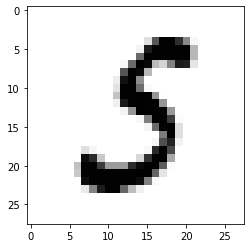

In [19]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    start = time()
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f'Evaluating finished, Elapse test time : {time() - start:10.4f}seconds')
    print(f'Accuracy: {accuracy.item()*100:.4}%' )

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.savefig('test.png')
    plt.show()